<a href="https://colab.research.google.com/github/nakampany/machine-learning-project/blob/master/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/機械学習特論 2022年度 知識社会基礎工学専攻/第3回/web_traffic.xlsx')
print(data[:10])

   1.0     2272.0
0     2.0     NaN
1     3.0  1386.0
2     4.0  1365.0
3     5.0  1488.0
4     6.0  1337.0
5     7.0  1883.0
6     8.0  2283.0
7     9.0  1335.0
8    10.0  1025.0
9    11.0  1139.0


In [ ]:
data.shape

(742, 2)

In [ ]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [ ]:
np.isnan(y)

0       True
1      False
2      False
3      False
4      False
       ...  
737    False
738    False
739    False
740    False
741    False
Name: 2272.0, Length: 742, dtype: bool

In [ ]:
np.sum(np.isnan(y))

8

In [ ]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [ ]:
print(x.shape,y.shape)

(734,) (734,)


In [ ]:
# plot input data
import matplotlib.pyplot as plt
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
    if models:
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)


In [ ]:
np.linspace(0.0, 10.0, 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [ ]:
len(np.linspace(0.0, 10.0, 20))

20

In [ ]:
L1 = ["a", "b", "c", "d", "e"]
L2 = [1, 2, 3, 4, 5]
zip(L1, L2)
for X, Y in zip(L1, L2):
    print (X, Y)

a 1
b 2
c 3
d 4
e 5


In [ ]:
# first look at the data
plot_models(x, y, None, "1400_01_01.png")

TypeError: ignored

In [ ]:
fp1, res, rank, sv, rcond = np.polyfit(x, y, 1, full=True)
fp1

array([  2.61052204, 981.90184838])

In [ ]:
fp1,res,rank,sv,rcond

(array([  2.61052204, 981.90184838]),
 array([3.15741295e+08]),
 2,
 array([1.3672059 , 0.36159096]),
 1.6298074001497298e-13)

In [ ]:
f1 = np.poly1d(fp1)
f1

poly1d([  2.61052204, 981.90184838])

In [ ]:
f1(10.0),f1(101.1),f1(201.0)

(1008.0070687897083, 1245.8256267077247, 1506.6167785848909)

In [ ]:
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

In [ ]:
error(f1,x,y)

315741295.29746145

In [ ]:
f2 = np.poly1d(np.polyfit(x, y, 2))
f2

poly1d([ 1.05092615e-02, -5.24490891e+00,  1.97091723e+03])

In [ ]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f3

poly1d([ 3.09485311e-05, -2.41672844e-02,  5.15779466e+00,  1.31178532e+03])

In [ ]:
f10 = np.poly1d(np.polyfit(x, y, 10))
f100 = np.poly1d(np.polyfit(x, y, 100))
f10,f100

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(poly1d([-5.01627356e-22,  1.86267911e-18, -2.97756664e-15,  2.68452764e-12,
        -1.50133887e-09,  5.38855171e-07, -1.23770508e-04,  1.75039203e-02,
        -1.39066573e+00,  5.07374067e+01,  1.04308065e+03]),
 poly1d([-7.58135443e-140,  1.35864262e-136, -6.31089548e-135,
        -5.32774734e-131, -2.84366127e-128,  3.11624778e-126,
         1.60442055e-122,  1.31198676e-119,  4.69040517e-117,
        -1.91081873e-114, -4.36972206e-111, -3.62835714e-108,
        -1.62065601e-105,  1.41488758e-103,  1.01146993e-099,
         1.04266354e-096,  6.17292913e-094,  1.27462375e-091,
        -1.90651154e-088, -2.80933210e-085, -2.07996759e-082,
        -7.65563076e-080,  2.96631548e-077,  7.42171726e-074,
         6.36350469e-071,  2.68094283e-068, -7.04468808e-066,
        -2.21077516e-062, -1.84078532e-059, -5.83157737e-057,
         4.68743022e-054,  7.59597971e-051,  4.11351855e-048,
        -7.94968921e-046, -2.94583434e-042, -1.71428557e-039,
         5.25218152e-037,  1.27577644e-03

KeyError: ignored

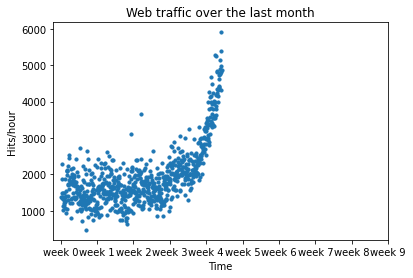

In [ ]:
plot_models(x, y, [f1], "1400_01_02.png")

KeyError: ignored

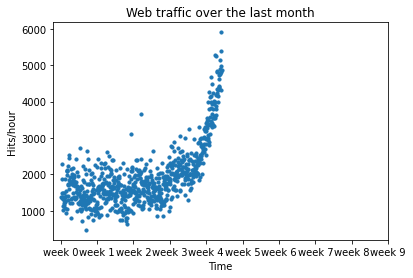

In [ ]:
plot_models(x, y, [f1, f2], "1400_01_03.png")

KeyError: ignored

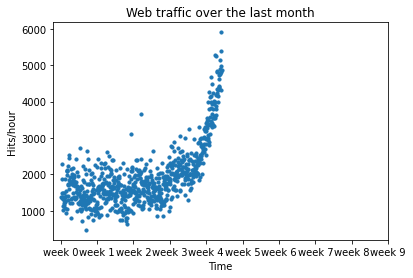

In [ ]:
plot_models(x, y, [f1, f2, f3, f10, f100],
"1400_01_04.png")

In [ ]:
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Error d=1: 315741295.297461
Error d=2: 179890848.740333
Error d=3: 138458295.737893
Error d=10: 120791850.284916
Error d=53: 109306169.203935


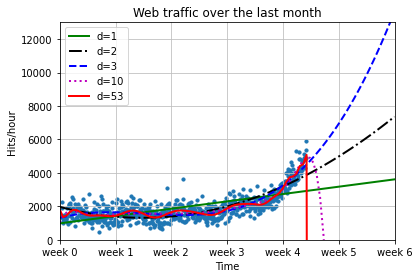

In [ ]:
plot_models(x, y, [f1, f2, f3, f10, f100],
"1400_01_05.png", mx=np.linspace(0, 6 * 7 * 24, 100),
ymax=13000)

In [ ]:
# fit and plot a model using the knowledge about inflection point
inflection = int(3.5 * 7 * 24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))
print("Error inflection=%f" % (error(fa, xa, ya) +
error(fb, xb, yb)))

Error inflection=132069916.166944


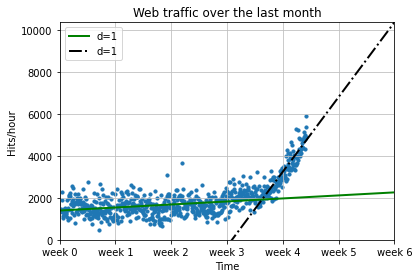

In [ ]:
plot_models(x, y, [fa, fb], "1400_01_07.png",
mx=np.linspace(0, 6 * 7 * 24, 100))

In [ ]:
# print("Trained only on data after inflection point")
fb1 = fb
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Error d=1: 22015612.909589
Error d=2: 19762883.741115
Error d=3: 19758367.413179
Error d=10: 18913866.197294
Error d=53: 18295453.437632


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


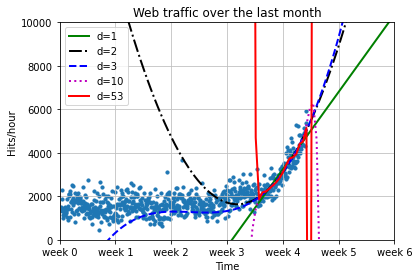

In [ ]:
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100], "1400_01_08.png",
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24
    )

In [ ]:
frac = 0.3
nplit_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:nplit_idx])
train = sorted(shuffled[nplit_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

KeyError: ignored

In [ ]:
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f,xb[test], yb[test])))

NameError: ignored

In [ ]:
plot_models(
            x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], "1400_01_09.png",
            mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
            ymax=10000, xmin=0 * 7 * 24)

In [ ]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 10000)
reached_max = fsolve(fbt2 - 10000, 800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])


NameError: ignored